<div style="background-color:#ffb770   ;padding:5px;border-radius:10px;border:10px solid #a3a3a3;color:#000000  ;text-align:center; font-weight: 1000; font-family: Babas; font-size: 3.0em;">
<p style="text-align:center;" > Automatic categorisation of stack overflow questions  |Modelling</p>
    
<p style="text-align:center;" ><img src="https://www.silicon.fr/wp-content/uploads/2019/08/stack_overflow.jpg"   width="400" height="250"/></p>
</div>

<a id="IR"></a>


 <h1 style="background-color:#ffb770 ;padding:20px;border-radius:10px;border:10px solid #a3a3a3;font-weight: 1000;color:#000000;text-align:center; font-size: 2.0em" >Import libraries and data</h1>


<a id="imp"></a>
## <span style="color:#763d05;  font-weight: 1000;font-size: 1.0em"> Import libraries </span>

In [1]:
#builtin
import os, sys, time, random

#data
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re 

from bs4 import BeautifulSoup
import unicodedata
import contractions
import nltk

import string
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import words, stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import plotly.express as px
import plotly.graph_objects as go

from tqdm.notebook import tqdm
tqdm.pandas()

# Target encodery
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# download

"""
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
"""

"\nnltk.download('omw-1.4')\nnltk.download('wordnet')\nnltk.download('stopwords')\nnltk.download('words')\nnltk.download('punkt')\n"

In [3]:
sns.set()

In [4]:
stopwords = nltk.corpus.stopwords.words('english')

In [5]:
DEBUG =False

<a id="imp"></a>
## <span style="font-weight: 1000;font-size: 1.0em"> Data loading and reading </span>

In [6]:
#df = pd.read_csv("./data/clean_data/data_cleaned.csv")
df = pd.read_pickle("./data/clean_data/data_cleaned.pkl")

if DEBUG == True:
    df = df.head(1000)

In [7]:
X_train = pd.read_pickle('./data/clean_data/X_train.pkl')
X_test = pd.read_pickle('./data/clean_data/X_test.pkl')
Y_train = pd.read_pickle('./data/clean_data/Y_train.pkl')
Y_test = pd.read_pickle('./data/clean_data/Y_test.pkl')

In [8]:
df.describe()

,Title,Body,title,text,titleandbody,top_tag,selected_tag
count,48299,48299,48299,48299,48299,48299,48299
unique,48298,48299,48298,48299,48299,15175,14303
top,A potentially dangerous Request.Form value was...,The EJB 3.0 specification does not allow a bus...,potentially dangerous request.form value detec...,ejb 3.0 specification allow business method st...,multithreading stateless session bean ejb 3.0 ...,[android],{android}
freq,2,1,2,1,1,1004,1004


In [9]:
df.head()

,Title,Body,title,text,titleandbody,top_tag,selected_tag
0,Multithreading in a stateless session bean?,The EJB 3.0 specification does not allow a bus...,multithreading stateless session bean,ejb 3.0 specification allow business method st...,multithreading stateless session bean ejb 3.0 ...,"[java, multithreading, jakarta-ee]","{multithreading, jakarta-ee, java}"
1,base64 JSON encoded strings in nodejs,How do I create a base64 JSON encoded strings ...,base64 json encoded string nodejs,create base64 json encoded string nodejs tried...,base64 json encoded string nodejs create base6...,"[javascript, json, node.js]","{json, node.js, javascript}"
2,"Link error: ""Cannot find -ltinfo"" on Ubuntu 12...",I get the following link error when I am compi...,link error `` find -ltinfo '' ubuntu 12.04 32-...,get following link error compiling small funct...,link error `` find -ltinfo '' ubuntu 12.04 32-...,"[c++, ubuntu]","{ubuntu, c++}"
3,How to sort array of strings which contains bo...,"String str[]={""-123"",""89"",""-10"",""456""}; str i...",sort array string contains negative positive n...,string str `` -123 '' '' 89 '' '' -10 '' '' 45...,sort array string contains negative positive n...,"[c++, arrays, string, algorithm, sorting]","{c++, string, sorting, arrays, algorithm}"
4,Multithreading program stuck in optimized mode...,I wrote a simple multithreading programs as fo...,multithreading program stuck optimized mode ru...,wrote simple multithreading program follows st...,multithreading program stuck optimized mode ru...,"[c++, multithreading]","{multithreading, c++}"


In [10]:
X_train.describe()

,Title,Body,title,text,titleandbody
count,32360,32360,32360,32360,32360
unique,32359,32360,32359,32360,32360
top,A potentially dangerous Request.Form value was...,I have been struggling the selectionStart and ...,potentially dangerous request.form value detec...,struggling selectionstart selectionend attribu...,selectionstart selectionend contenteditable el...
freq,2,1,2,1,1


In [11]:
Y_train.describe()

count         32360
unique        11359
top       [android]
freq            673
Name: top_tag, dtype: object

In [12]:
X_test.describe()

,Title,Body,title,text,titleandbody
count,15939,15939,15939,15939,15939
unique,15939,15939,15939,15939,15939
top,Animated rgl graphs with knitr,I want to include animated rgl graphs in my .R...,animated rgl graph knitr,want include animated rgl graph .rnw document ...,animated rgl graph knitr want include animated...
freq,1,1,1,1,1


In [13]:
Y_test.describe()

count         15939
unique         6694
top       [android]
freq            331
Name: top_tag, dtype: object

<a id="imp"></a>
## <span style="font-weight: 1000;font-size: 1.0em"> Data transformation </span>

We split our dataset into train and test sets.

In [14]:
no_features=4000
tfidf_vectorizert = TfidfVectorizer(max_df=0.95, 
                                   min_df=2, 
                                   max_features=no_features, 
                                   stop_words='english')
X_train_tfidft = tfidf_vectorizert.fit_transform(X_train.title)
X_test_tfidft = tfidf_vectorizert.transform(X_test.title)
text_features = tfidf_vectorizert.get_feature_names_out()

In [15]:
tfidf_vectorizerb = TfidfVectorizer(max_df=0.95, 
                                   min_df=2, 
                                   max_features=no_features, 
                                   stop_words='english')
X_train_tfidfb = tfidf_vectorizerb.fit_transform(X_train.text)
X_test_tfidfb = tfidf_vectorizerb.transform(X_test.text)
text_features = tfidf_vectorizerb.get_feature_names_out()

In [16]:
vectorizerb = CountVectorizer(max_df=0.95, 
                             min_df=2,  
                             stop_words='english')
X_train_cvb = vectorizerb.fit_transform(X_train.text)
X_test_cvb = vectorizerb.transform(X_test.text)

In [17]:
vectorizert = CountVectorizer(max_df=0.95, 
                             min_df=2,  
                             stop_words='english')
X_train_cvt = vectorizert.fit_transform(X_train.title)
X_test_cvt = vectorizert.transform(X_test.title)

In [18]:
tfidf_vectorizertb = TfidfVectorizer(max_df=0.95, 
                                   min_df=2, 
                                   max_features=no_features, 
                                   stop_words='english')
X_train_tfidftb = tfidf_vectorizertb.fit_transform(X_train.titleandbody)
X_test_tfidftb = tfidf_vectorizertb.transform(X_test.titleandbody)

In [19]:
vectorizertb = CountVectorizer(max_df=0.95, 
                             min_df=2,
                             max_features=no_features,
                             stop_words='english')
X_train_cvtb = vectorizertb.fit_transform(X_train.titleandbody)
title_text_feature = vectorizertb.get_feature_names_out()
X_test_cvtb = vectorizertb.transform(X_test.titleandbody)

In [20]:
from scipy.sparse import hstack
X_train_tfidf = hstack([X_train_tfidft, X_train_tfidfb])
X_test_tfidf = hstack([X_test_tfidft, X_test_tfidfb])

X_train_cv = hstack([X_train_cvt, X_train_cvb])
X_test_cv = hstack([X_test_cvt, X_test_cvb])

In [21]:
mlb = MultiLabelBinarizer()
#mlb.fit(Y_train)
y_train_mlb = mlb.fit_transform(Y_train)
y_test_mlb = mlb.transform(Y_test)
tags = mlb.classes_

<a id="IR"></a>
<h1 style="background-color:#ffb770 ;padding:20px;border-radius:10px;border:10px solid #a3a3a3;font-weight: 1000;color:#000000;text-align:center; font-size: 2.0em" >Tags Modelling: Supervised Approach</h1>

## OneVsRest Classifier

### Countvectorizer Transformer

In [22]:
# Classifiers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDOneClassSVM
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, accuracy_score, jaccard_score, make_scorer, hamming_loss
from sklearn.model_selection import cross_val_score

# Fine tuning

from sklearn.metrics import f1_score
from hyperopt import fmin, tpe, hp, Trials
import optuna

In [23]:
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support as score
from typing import Dict, Any, Tuple


def modelling(models: Dict[str, Any], X_train: pd.DataFrame, X_test: pd.DataFrame,
              y_train: pd.DataFrame, y_test: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """
    Perform classification using multiple models and evaluate their performance.

    Args:
        models (Dict[str, Any]): A dictionary containing the names of the classifiers as keys and the corresponding
                                 classifier objects as values.
        X_train (pd.DataFrame): The training data features.
        X_test (pd.DataFrame): The testing data features.
        y_train (pd.DataFrame): The training data labels.
        y_test (pd.DataFrame): The testing data labels.

    Returns:
        Dict[str, Dict[str, float]]: A dictionary containing the evaluation scores for each classifier.

    """
    scores = {}
    for clf_name, classifier in models.items():
        print("*" * 89)
        print(f"{' ' * 38}{clf_name}")
        print("*" * 89)

        clf = OneVsRestClassifier(classifier)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred = clf.predict(X_test)

        precision_train = precision_score(y_train, y_pred_train, average="micro")
        precision = precision_score(y_test, y_pred, average="micro")
        recall_train = recall_score(y_train, y_pred_train, average="micro")
        recall = recall_score(y_test, y_pred, average="micro")
        fscore_train = f1_score(y_train, y_pred_train, average="micro")
        fscore = f1_score(y_test, y_pred, average="micro")
        jaccard_train = jaccard_score(y_train, y_pred_train, average='samples')
        jaccard = jaccard_score(y_test, y_pred, average='samples')
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy = accuracy_score(y_test, y_pred)
        hamLoss_train = hamming_loss(y_train, y_pred_train)
        hamLoss = hamming_loss(y_test, y_pred)

        print(f"precision on train: {precision_train}, and test: {precision}")
        print(f"recall score on train: {recall_train}, and test: {recall}")
        print(f"fscore score on train: {fscore_train}, and test: {fscore}")
        print(f"Jaccard score on train: {jaccard_train}, and test: {jaccard}")
        print(f"Accuracy score on train: {accuracy_train}, and test: {accuracy}")
        print(f"Hamming Loss score on train: {hamLoss_train}, and test: {hamLoss}")

        scores[clf_name] = {
            "Precision": precision,
            "Recall": recall,
            "Fscore": fscore,
            "Jaccard": jaccard,
            "Accuracy": accuracy,
            "Hamming Loss": hamLoss
        }
    return scores

In [24]:
models = {                   
                   'Logistic Regression' : LogisticRegression( random_state=42),
                   'Linear SVC': LinearSVC(),
                    #"Ridge Classifier" :  RidgeClassifier(random_state=42),
                   # "lgbm Classifier": LGBMClassifier(random_state=42),
                   'SGDClassifier': SGDClassifier(random_state=42),
                    "Passive Aggressive Classifier" : PassiveAggressiveClassifier(random_state=42),
                    "Perceptron" : Perceptron(random_state=42),
                    "Solves linear One-Class SVM" : SGDOneClassSVM(random_state=42),
                    "MultinomialNB" : MultinomialNB()
                  }

In [25]:
Scoring_cv = modelling(models, X_train_cv,X_test_cv, y_train_mlb, y_test_mlb)

*****************************************************************************************
                                      Logistic Regression
*****************************************************************************************
precision on train: 0.9980453988689375, and test: 0.6421436667611221
recall score on train: 0.974328965780435, and test: 0.470004148086695
fscore score on train: 0.9860445954992534, and test: 0.5427519310220945
Jaccard score on train: 0.9749933044911413, and test: 0.40044973281433566
Accuracy score on train: 0.95163782447466, and test: 0.13150134889265325
Hamming Loss score on train: 0.0003349814585908529, and test: 0.009582156973461322
*****************************************************************************************
                                      Linear SVC
*****************************************************************************************
precision on train: 0.9999491158885638, and test: 0.5468375592086933
recall score on train: 

In [26]:
score_cv = pd.DataFrame(Scoring_cv)
score_cv

,Logistic Regression,Linear SVC,SGDClassifier,Passive Aggressive Classifier,Perceptron,Solves linear One-Class SVM,MultinomialNB
Precision,0.642144,0.546838,0.554651,0.564325,0.440896,0.012264,0.455271
Recall,0.470004,0.508815,0.489396,0.496967,0.513274,0.324173,0.526444
Fscore,0.542752,0.527141,0.519985,0.528508,0.474340,0.023633,0.488278
Jaccard,0.400450,0.397789,0.386883,0.399818,0.367156,0.003922,0.358701
Accuracy,0.131501,0.110546,0.108037,0.118012,0.087145,0.000000,0.073468
Hamming Loss,0.009582,0.011045,0.010933,0.010729,0.013765,0.324099,0.013352


In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50)
forest = forest.fit(X_train_cv, y_train_mlb)

#estimate the best predicted tags
y_pred_forest = forest.predict(X_test_cv)
print("The accuracy is :", accuracy_score(y_test_mlb, y_pred_forest))
print("The precision is :",  precision_score(y_test_mlb, y_pred_forest, average = "micro"))
print("The fscore is :",  f1_score(y_test_mlb, y_pred_forest, average = "micro"))
print("The jaccard_score is:", metrics.jaccard_score(y_test_mlb, y_pred_forest, average = "samples"))

The accuracy is : 0.06255097559445386
The precision is : 0.8790631653655074
The fscore is : 0.27152158186640946
The jaccard_score is: 0.1780088671393019


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
extra_trees = ExtraTreesClassifier()
extra_trees = extra_trees.fit(X_train_cv, y_train_mlb)

#estimate the best predicted tags
y_pred_extra_trees = extra_trees.predict(X_test_cv)
print("The accuracy is :", accuracy_score(y_test_mlb, y_pred_extra_trees))
print("The precision is :",  precision_score(y_test_mlb, y_pred_extra_trees, average = "micro"))
print("The fscore is :",  f1_score(y_test_mlb, y_pred_extra_trees, average = "micro"))
print("The jaccard_score is:", metrics.jaccard_score(y_test_mlb, y_pred_extra_trees, average = "samples"))

The accuracy is : 0.08438421481899742
The precision is : 0.8837081128747796
The fscore is : 0.336537654269163
The jaccard_score is: 0.22551573110579323


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc = knc.fit(X_train_cv, y_train_mlb)

#estimate the best predicted tags
y_pred = knc.predict(X_test_cv)
print(accuracy_score(y_test_mlb, y_pred))
print("The accuracy is :", accuracy_score(y_test_mlb, y_pred))
print("The precision is :",  precision_score(y_test_mlb, y_pred, average = "micro"))
print("The fscore is :",  f1_score(y_test_mlb, y_pred, average = "micro"))
print("The jaccard_score is:", metrics.jaccard_score(y_test_mlb, y_pred, average = "samples"))

0.04184704184704185
The accuracy is : 0.04184704184704185
The precision is : 0.5599607458292444
The fscore is : 0.2340346991509782
The jaccard_score is: 0.14112770712149594


### Term Frequency et Inverse Document Frequency Transformer

In [30]:
models = {                   
                   'Logistic Regression' : LogisticRegression( random_state=42),
                   'Linear SVC': LinearSVC(),
                    #"Ridge Classifier" :  RidgeClassifier(random_state=42),
                    "lgbm Classifier": LGBMClassifier(random_state=42),
                   'SGDClassifier': SGDClassifier(random_state=42),
                    "Passive Aggressive Classifier" : PassiveAggressiveClassifier(random_state=42),
                    "Perceptron" : Perceptron(random_state=42),
                    "Solves linear One-Class SVM" : SGDOneClassSVM(random_state=42),
                    "MultinomialNB" : MultinomialNB()
                  }

In [31]:
Scoring_tfidf = modelling(models, X_train_tfidftb,X_test_tfidftb, y_train_mlb, y_test_mlb)

*****************************************************************************************
                                      Logistic Regression
*****************************************************************************************
precision on train: 0.8515451423954756, and test: 0.7911482513153822
recall score on train: 0.37542297417631343, and test: 0.3313543503059214
fscore score on train: 0.5211049996909956, and test: 0.46708206187074025
Jaccard score on train: 0.36858253870151275, and test: 0.319762472402224
Accuracy score on train: 0.14289245982694684, and test: 0.11405985319028797
Hamming Loss score on train: 0.008381180469715699, and test: 0.009148942844595019
*****************************************************************************************
                                      Linear SVC
*****************************************************************************************
precision on train: 0.9274862675882091, and test: 0.7467469575104224
recall score on tr

In [32]:
score_tfidf = pd.DataFrame(Scoring_tfidf)
score_tfidf

,Logistic Regression,Linear SVC,lgbm Classifier,SGDClassifier,Passive Aggressive Classifier,Perceptron,Solves linear One-Class SVM,MultinomialNB
Precision,0.791148,0.746747,0.690777,0.832708,0.564825,0.504482,0.0000,0.743080
Recall,0.331354,0.459738,0.505833,0.339262,0.498315,0.488748,0.0000,0.157990
Fscore,0.467082,0.569104,0.584013,0.482104,0.529490,0.496491,0.0000,0.260578
Jaccard,0.319762,0.425390,0.440707,0.339532,0.398402,0.368085,0.0000,0.156787
Accuracy,0.114060,0.159922,0.149696,0.125667,0.111927,0.088400,0.0000,0.045800
Hamming Loss,0.009149,0.008424,0.008719,0.008820,0.010716,0.011995,0.0121,0.010849


In [33]:
import lightgbm as lgb

params = {
    'objective': 'multiclass',
    'num_class': len(y_train_mlb[0]),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'num_classes': len(tags)
}
y_train = np.argmax(y_train_mlb, axis=1)
y_test = np.argmax(y_test_mlb, axis=1)

lgb_train = lgb.Dataset(X_train_tfidftb, y_train)
lgb_eval = lgb.Dataset(X_test_tfidftb, y_test, reference=lgb_train)

num_round = 100
model = lgb.train(params, lgb_train, num_round, valid_sets=[lgb_train, lgb_eval], early_stopping_rounds=10)


[LightGBM] [Warning] num_class is set=200, num_classes=200 will be ignored. Current value: num_class=200
[1]	training's multi_logloss: 5.66988	valid_1's multi_logloss: 7.11363
Training until validation scores don't improve for 10 rounds
[2]	training's multi_logloss: 5.25714	valid_1's multi_logloss: 7.80148
[3]	training's multi_logloss: 9.10451	valid_1's multi_logloss: 11.8851
[4]	training's multi_logloss: 11.2086	valid_1's multi_logloss: 14.8564
[5]	training's multi_logloss: 18.6909	valid_1's multi_logloss: 21.9036
[6]	training's multi_logloss: 26.2319	valid_1's multi_logloss: 28.6426
[7]	training's multi_logloss: 31.3688	valid_1's multi_logloss: 32.031
[8]	training's multi_logloss: 32.2174	valid_1's multi_logloss: 32.2349
[9]	training's multi_logloss: 32.021	valid_1's multi_logloss: 32.0129
[10]	training's multi_logloss: 32.1003	valid_1's multi_logloss: 32.2221
[11]	training's multi_logloss: 31.2541	valid_1's multi_logloss: 31.414
Early stopping, best iteration is:
[1]	training's mult

In [34]:
y_pred = model.predict(X_test_tfidftb)

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test_mlb, y_pred, average='macro')
print('ROC AUC score:', roc_auc)

ROC AUC score: 0.6664857985257391


In [36]:
y_pred_proba = model.predict(X_test_tfidftb)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calculate the ROC AUC score using roc_auc_score from scikit-learn
roc_auc = roc_auc_score(y_test_mlb, y_pred_proba, average='weighted', multi_class='ovr')
print('ROC AUC score:', roc_auc)
# Calculate the Jaccard score using jaccard_score from scikit-learn
jaccard = jaccard_score(y_test_mlb, y_pred, average='weighted')
print("The jaccard_score is:", jaccard)

ROC AUC score: 0.6393603958288044
The jaccard_score is: 0.10112002081408838


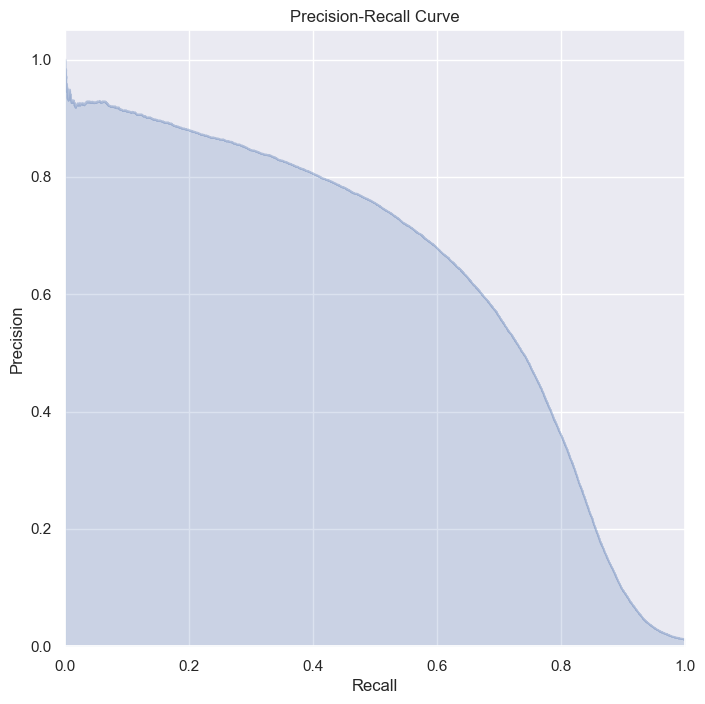

In [37]:
from sklearn.metrics import precision_recall_curve
clf = OneVsRestClassifier(SGDClassifier(random_state=42))
clf.fit(X_train_tfidftb, y_train_mlb)
# Get predicted probabilities for each label
y_scores = clf.decision_function(X_test_tfidftb)

# Compute precision-recall curve for each label
precision, recall, _ = precision_recall_curve(y_test_mlb.ravel(), y_scores.ravel())

# Plot precision-recall curve for each label
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


Text(0.5, 1.0, 'Micro-average Receiver Operating Characteristic')

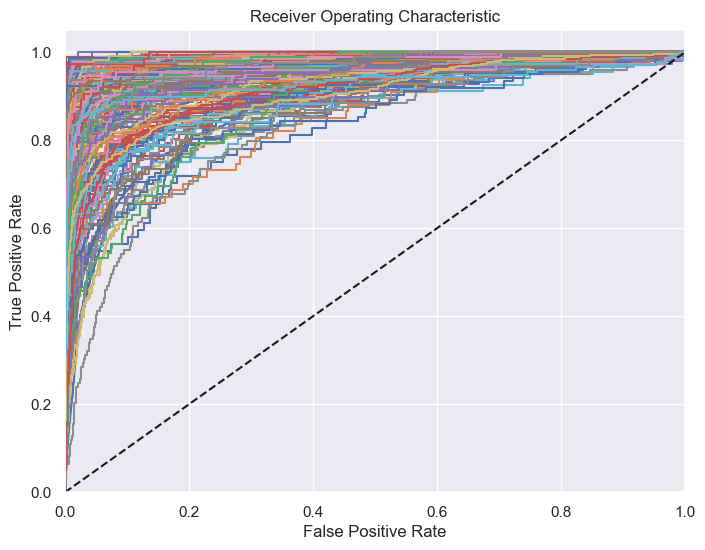

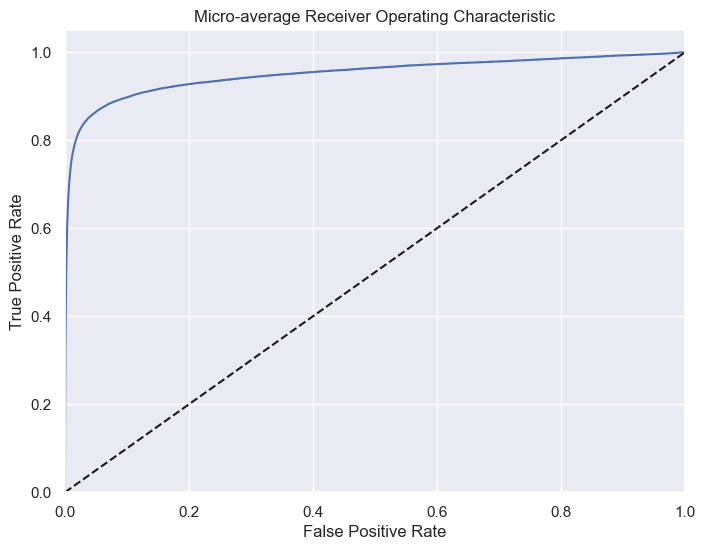

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the labels
y_test_bin = label_binarize(y_test_mlb, classes=list(range(len(tags))))

# Get predicted probabilities for each label
y_scores = clf.decision_function(X_test_tfidftb)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(tags)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i in range(len(tags)):
    plt.plot(fpr[i], tpr[i], label=f'{tags[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
#plt.legend(loc='lower right')

# Plot micro-average ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic')
#plt.legend(loc='lower right')


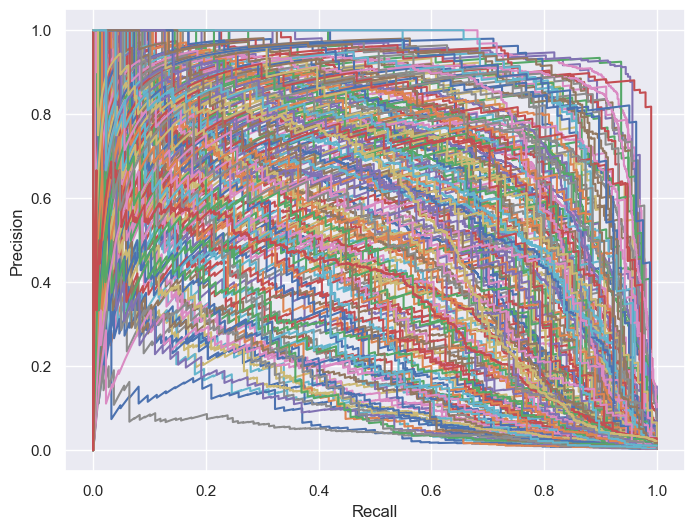

In [39]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for each label
y_scores = clf.decision_function(X_test_tfidftb)

# Compute precision-recall curve for each label
precision = dict()
recall = dict()
for i in range(len(tags)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_mlb[:, i], y_scores[:, i])

# Plot precision-recall curves for each label
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(tags)):
    ax.plot(recall[i], precision[i], label=tags[i])

# Set axis labels and legend
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
#ax.legend()
ax.grid(True)
plt.show()


In [40]:
%%time
C_range = [0.01, 0.1, 1, 10, 100, 1000]
for i in C_range:
    clf = OneVsRestClassifier(LogisticRegression(C = i, solver =  "sag"))
    clf.fit(X_train_tfidftb, y_train_mlb)
    y_pred_train = clf.predict(X_train_tfidftb)
    y_pred_cv = clf.predict(X_test_tfidftb)
    f1_score_train = metrics.f1_score(y_train_mlb, y_pred_train, average = "micro")
    f1_score_cv = metrics.f1_score(y_test_mlb, y_pred_cv, average = "micro")
    jaccard_score_train = jaccard_score(y_train_mlb, y_pred_train, average = "weighted")
    jaccard_score_test = jaccard_score(y_test_mlb, y_pred_cv, average = "weighted")
    print("C:", i, "Train Score:",jaccard_score_train, "CV Score:", jaccard_score_test)
    print("-"*50)

C: 0.01 Train Score: 0.00011443275467879121 CV Score: 7.77766255314736e-05
--------------------------------------------------
C: 0.1 Train Score: 0.07941018116573802 CV Score: 0.07692939300935561
--------------------------------------------------
C: 1 Train Score: 0.3502202468925219 CV Score: 0.30317696683167017
--------------------------------------------------
C: 10 Train Score: 0.6317920792155545 CV Score: 0.3905603676992654
--------------------------------------------------
C: 100 Train Score: 0.9079831834113543 CV Score: 0.3827961598590174
--------------------------------------------------
C: 1000 Train Score: 0.9390185670897215 CV Score: 0.36999862612057927
--------------------------------------------------
CPU times: total: 19min 27s
Wall time: 19min 58s


In [41]:
forest = RandomForestClassifier()
forest = forest.fit(X_train_tfidftb, y_train_mlb)

#estimate the best predicted tags
y_pred_forest = forest.predict(X_test_tfidftb)
print("The accuracy is :", accuracy_score(y_test_mlb, y_pred_forest))
print("The precision is :",  precision_score(y_test_mlb, y_pred_forest, average = "micro"))
print("The fscore is :",  f1_score(y_test_mlb, y_pred_forest, average = "micro"))
print("The jaccard_score is:", jaccard_score(y_test_mlb, y_pred_forest, average = "weighted"))

The accuracy is : 0.09781040215822824
The precision is : 0.8437822941784361
The fscore is : 0.3904830224772836
The jaccard_score is: 0.23420975474659664


In [42]:
extra_trees = ExtraTreesClassifier()
extra_trees = extra_trees.fit(X_train_tfidftb, y_train_mlb)

#estimate the best predicted tags
y_pred_extra_trees = extra_trees.predict(X_test_tfidftb)
print("The accuracy is :", accuracy_score(y_test_mlb, y_pred_extra_trees))
print("The precision is :",  precision_score(y_test_mlb, y_pred_extra_trees, average = "micro"))
print("The fscore is :",  f1_score(y_test_mlb, y_pred_extra_trees, average = "micro"))
print("The jaccard_score is:", jaccard_score(y_test_mlb, y_pred_extra_trees, average = "weighted"))

The accuracy is : 0.08858774076165381
The precision is : 0.8577556109725686
The fscore is : 0.3538901578286725
The jaccard_score is: 0.20955580364019583


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc = knc.fit(X_train_tfidftb, y_train_mlb)

#estimate the best predicted tags
y_pred = knc.predict(X_test_tfidftb)
print(accuracy_score(y_test_mlb, y_pred))
print("The accuracy is :", accuracy_score(y_test_mlb, y_pred))
print("The precision is :",  precision_score(y_test_mlb, y_pred, average = "micro"))
print("The fscore is :",  f1_score(y_test_mlb, y_pred, average = "micro"))
print("The jaccard_score is:", jaccard_score(y_test_mlb, y_pred, average = "weighted"))

0.08469791078486731
The accuracy is : 0.08469791078486731
The precision is : 0.6459333049869405
The fscore is : 0.3864449895521032
The jaccard_score is: 0.236831192944044


In [44]:
%%time

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(n_jobs=-1)

clf = OneVsRestClassifier(sgd_classifier)
clf.fit(X_train_tfidf, y_train_mlb)

CPU times: total: 40.4 s
Wall time: 16.7 s


OneVsRestClassifier(estimator=SGDClassifier(n_jobs=-1))

In [45]:
y_pred = clf.predict(X_test_tfidf)

In [46]:
y_pred.shape

(15939, 200)

In [47]:
y_test_mlb.shape

(15939, 200)

In [48]:
%%time

precision, recall, fscore, support = score(y_test_mlb, y_pred)

print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"fscore: {fscore}")
print(f"support: {support}")

precision: [0.69294606 0.         0.83333333 0.86046512 0.97619048 0.75757576
 0.94886364 0.         0.84090909 0.86813187 1.         0.82926829
 0.94285714 0.         0.66176471 0.73333333 0.77083333 0.77124183
 0.86666667 0.         0.84210526 0.86666667 0.87755102 0.58
 0.71052632 0.50909091 0.92063492 0.90740741 0.86666667 0.
 0.         0.82978723 0.74353289 0.88795518 0.7109375  0.62962963
 0.         0.85714286 0.         0.         0.         0.
 0.94736842 0.84375    0.         0.5        0.76       0.45945946
 0.76363636 0.55172414 1.         0.91304348 1.         0.82857143
 0.9754902  0.98684211 0.9        0.63636364 0.61904762 0.74193548
 0.85393258 0.         0.90322581 0.5        0.85       0.70689655
 0.         0.90588235 0.71428571 0.5        0.         0.91025641
 0.84210526 0.92561983 0.96875    0.81553398 0.92       0.97674419
 0.88043478 0.77993528 1.         0.75       0.79487179 0.64285714
 0.5625     0.62962963 0.8        0.78635015 0.79166667 0.69230769
 0.795

In [49]:

hamming = []

for i, (test, pred) in enumerate(zip(y_test_mlb.T, y_pred.T)):
    hamming.append(hamming_loss(test, pred))



In [50]:
metric_df = pd.DataFrame(data=[precision, recall, fscore, hamming, support],
                         index=["Precision", "Recall", "F-1 score", "Hamming loss", "True count"],
                         columns=tags)
metric_df

,.net,.net-core,ajax,algorithm,amazon-s3,amazon-web-services,android,android-layout,android-studio,angular,...,wcf,web-services,winapi,windows,winforms,wpf,x86,xaml,xcode,xml
Precision,0.692946,0.000000,0.833333,0.860465,0.976190,0.757576,0.948864,0.000000,0.840909,0.868132,...,0.937500,0.666667,1.000000,0.673077,0.882353,0.965116,0.916667,0.695652,0.783784,0.764706
Recall,0.167167,0.000000,0.497238,0.285714,0.621212,0.625000,0.754973,0.000000,0.366337,0.560284,...,0.576923,0.132231,0.020619,0.102941,0.238095,0.645914,0.122222,0.190476,0.329545,0.443182
F-1 score,0.269355,0.000000,0.622837,0.428986,0.759259,0.684932,0.840886,0.000000,0.510345,0.681034,...,0.714286,0.220690,0.040404,0.178571,0.375000,0.773893,0.215686,0.299065,0.464000,0.561151
Hamming loss,0.056842,0.004078,0.006839,0.012360,0.001631,0.004329,0.019826,0.004204,0.004454,0.004643,...,0.002259,0.007090,0.005960,0.020202,0.006274,0.006086,0.005019,0.004705,0.016814,0.007654
True count,999.000000,65.000000,181.000000,259.000000,66.000000,120.000000,1106.000000,67.000000,101.000000,141.000000,...,78.000000,121.000000,97.000000,340.000000,126.000000,257.000000,90.000000,84.000000,352.000000,176.000000


In [51]:
metric_df.loc[:, metric_df.columns.str.startswith(".net")]

,.net,.net-core
Precision,0.692946,0.000000
Recall,0.167167,0.000000
F-1 score,0.269355,0.000000
Hamming loss,0.056842,0.004078
True count,999.000000,65.000000


In [52]:
top_ten_tags = ["c#", "java",  "python", "javascript","php", "android", "jquery", "html", "c++", "ios"]
metric_df[top_ten_tags]

,c#,java,python,javascript,php,android,jquery,html,c++,ios
Precision,0.743533,0.827535,0.908171,0.768282,0.892774,0.948864,0.880597,0.779935,0.887955,0.786350
Recall,0.496545,0.611263,0.772448,0.565866,0.566568,0.754973,0.506873,0.335655,0.491092,0.672020
F-1 score,0.595442,0.703145,0.834829,0.651719,0.693213,0.840886,0.643402,0.469328,0.632419,0.724704
Hamming loss,0.085764,0.059226,0.031181,0.058473,0.021269,0.019826,0.020516,0.034193,0.046239,0.037894
True count,2026.000000,1829.000000,1626.000000,1541.000000,676.000000,1106.000000,582.000000,718.000000,1291.000000,1183.000000


In [53]:
import numpy as np
metric_df[top_ten_tags].apply(np.mean, axis=1)

Precision          0.842400
Recall             0.577330
F-1 score          0.678909
Hamming loss       0.041458
True count      1257.800000
dtype: float64

In [54]:
non_zero_metric_df = metric_df.loc[:, metric_df.loc["F-1 score"] > 0]

In [55]:
non_zero_metric_df.apply(np.mean, axis=1)

Precision         0.823238
Recall            0.393917
F-1 score         0.498169
Hamming loss      0.008518
True count      210.220930
dtype: float64

Text(0, 0.5, 'Recall')

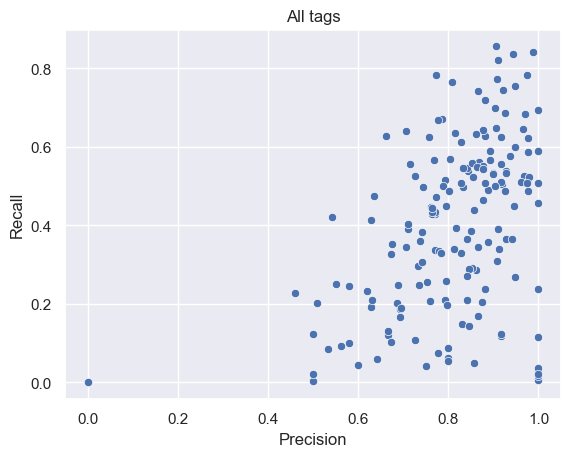

In [56]:
sns.scatterplot(x=metric_df.loc["Precision"], y=metric_df.loc["Recall"])
plt.title("All tags")
plt.xlabel("Precision")
plt.ylabel("Recall")

Text(35.0, 0.5, 'Recall')

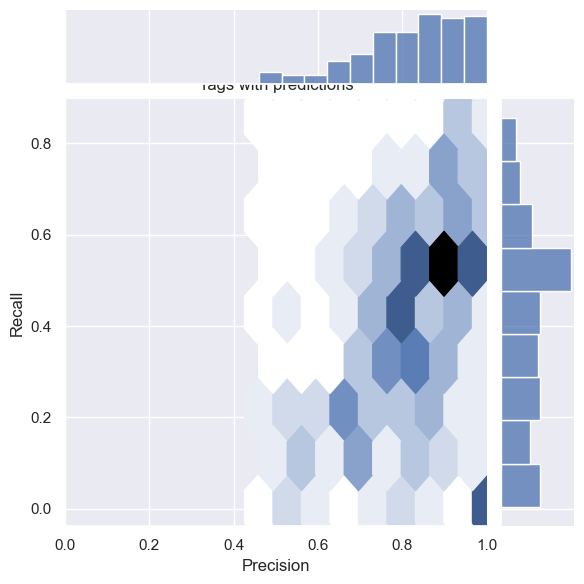

In [57]:
sns.jointplot(x=non_zero_metric_df.loc["Precision"], y=non_zero_metric_df.loc["Recall"], kind="hex")
plt.title("Tags with predictions")
plt.xlim((0,1))
plt.xlabel("Precision")
plt.ylabel("Recall")

# Bibliographie

**Jens Albrecht, Sidharth Ramachandran, and Christian Winkler (2021)**, *Blueprints for Text Analytics Using Python*

**Chris McCormick and Nick Ryan. (2019, May 14).** *BERT Word Embeddings Tutorial.* Retrieved from http://www.mccormickml.com